#TP Méthodes des différences temporelles -- SARSA et Q-Learning

## Frozen Lake

l'environnement Frozen Lake est un monde grille incertain dans lequel on part depuis un état initial (la case la plus en haut à gauche) pour aller à un état final (la case la plus basse à droite). L'environnement est incertain car vous marchez sur un lac gelé et l'épaisseur de glace varie. Vous pouvez donc tomber dans l'eau dans certaines cases. De plus, la glace est plus glissante à certains endroits, et donc faire un pas peut vous mener plus loin que prévu... et si le vent s'en mèle...

Au lieu d'essayer d'estimer le modèle de transition, on va utiliser SARSA et Q-learning pour résoudre ce problème.

Utilisez l'environnement Frozen Lake pour implémenter SARSA et Q-learning. Utilisez d'abord l'environnement avec une grille 4x4 pour tester vos algorithmes, puis vous devriez pouvoir les utiliser pour la grille 16x16.



## FrozenLake - familiarisation avec l'environnement

Evaluez une politique aléatoire. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import gym

from tqdm import tqdm

env = gym.make("FrozenLake8x8-v0",  is_slippery=True)
numStates = env.observation_space.n
numActions = env.action_space.n
print("Environnement avec ", numStates, " états et ", numActions, " actions")
env.reset()
nbIt=0
rew=[]
done=False
while not done:
  observation, reward, done, info = env.step(np.random.randint(4))
  env.render()
  nbIt+=1
  rew = rew+[reward]
print("Episode terminé après {} itérations".format(nbIt))
print("Récompenses obtenues:",rew)
env.close()

Environnement avec  64  états et  4  actions
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFH

In [2]:
env.step(3)

(29, 0, True, {'prob': 1.0})

## SARSA

### $\epsilon$-greedy

Implémentez une fonction qui chosit une action avec la stratégie $\epsilon$-greedy:
* exploite avec un probabilité $1-\epsilon$: ici on choisit l'action avec la meilleure valeur de $q[s]$
* explore avec une probabilité $\epsilon$: on choisit une action de manière uniforme sur toute les actions.

### SARSA

Implémentez un fonction SARSA qui prend en paramètre
 * un nombre d'épisodes utilisés pour l'apprentissage
 * $\gamma$ le taux d'escompte
 * $\alpha$ le taux d'apprentissage (que l'on retrouve lors de la mise à jour des valeurs de Q)
 * $\epsilon$ le paramètre pour la méthode $\epsilon$-greedy.

Votre fonction doit au moins retourner la table $Q: S \times A$. Vous trouverez ci-dessous une fonction $plotQ$ qui génère une représentation de la table $Q$: pour chaque case sera dessiné la meilleure action selon $Q$ et la couleur représentera la valeur de cette action.
 
Pour visualiser les progrès faits pendant l'apprentissage, votre fonction SARSA peut également retourner une séquence de valeurs. Par exemple,
 * la séquence de récompenses (totale ou moyenne) obtenue sur chaque épisode de l'apprentissage
 * la valeur de la meilleure action pour l'état de départ à chaque fin d'épisode.
 * au lieu d'utiliser les valeurs obtenues lors de l'apprentissage, vous pouvez aussi effectuer périodiquement une évaluation de la politique courante (sans exploration). Pour ce faire, vous pouvez calculer la performance sur un petit nombre d'épisodes et retourner la moyenne. Cette méthode a l'avantage d'évaluer la politique sans exploration (donc une meilleure évaluation de la politique), mais peut coûter cher en temps de calcul suivant la fréquence d'exécution et le nombre d'épisodes utilisés pour l'évaluation.

En générant le graphique, vous devriez visualiser si l'algorithme est arrivé à améliorer les performances. Vous pouvez soit tracer directement la valeur de chaque épisode. Pour avoir une courbe un peu plus lisse, vous pouvez aussi calculer une moyenne sur une fenêtre de $k$ épisodes (la fonction $runningAvg$ effectue ce travail).

Notez qu'on considère Frozen lake comme résolu quand
 * il atteint le but dans 78% des épisodes pour la grille 4x4.
 * a priori, on peut atteindre 100% pour la grille 8x8

Quelques idées pour aider au debeug:
 * vous pouvez aussi regarder si la plupart des paires état-actions ont été exécutée. 
 * Vous pouvez choisir comme paramètres (le code que j'ai écrit a fonctionné avec ces paramètres, évidemment, vous pouvez essayer avec d'autres par la suite).
   * $\epsilon=0.2$
   * $\alpha=0.02$


In [ ]:

env.render()

  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [ ]:
# à implémenter
def e_greedy(epsilon, q, s):
    """ Renvoie l'action choisie avec une politique e_greedy """
    p = np.random.uniform()
    if p > epsilon: # glouton
        list_q = np.argwhere(q[s] == np.amax(q[s])).flatten().tolist()
        action_picked = random.choice(list_q)
    else:  # exploration
        action_picked = random.choice([0, 1, 2, 3])
    return action_picked

def sarsa(n_episodes, gamma, alpha, epsilon, numStates, numActions):
    # initialisation 
    q = np.zeros((numStates, numActions))
    rewards = []

    for episode in tqdm(range(n_episodes)):
        s = env.reset() # On initialise l'état frozen lake
        action_a = e_greedy(epsilon, q, s)
        done = False
        nbIt = 0
        while not done:
            observation, reward, done, info = env.step(action_a)
            if done:
                q[s][action_a] = q[s][action_a] + alpha * (reward - q[s][action_a])
                rewards.append(reward)
            else:
                #env.render()
                nbIt += 1
    
                # choisir a' pour s' à l'aide d'une politique dérivée
                action_a_prim = e_greedy(epsilon, q, observation)

                # Mise à jour
                q[s][action_a] = q[s][action_a] + alpha * (reward + gamma*q[observation][action_a_prim] - q[s][action_a])
                s = observation
                action_a = action_a_prim
        
    return q, rewards


In [ ]:
n_episodes = 40000
alpha = 0.05
epsilon = 0.05
gamma = 0.999

In [ ]:
sarsa_q, rewards = sarsa(n_episodes, gamma, alpha, epsilon, numStates, numActions)

100%|██████████| 40000/40000 [04:18<00:00, 154.49it/s]


In [ ]:
def runningAvg(data, windowSize):
  res = np.zeros(len(data)-windowSize)
  sum=0
  for i in range(windowSize):
    sum += data[i]
  for i in range(len(data)-windowSize):
    res[i]= sum/windowSize
    sum -= data[i]
    sum += data[i+windowSize]
  return res


# visualisation de la table Q pour FrozenLake 4x4 et 8x8
# passez la taille (4 ou 8) en paramètres
def plotQ(q_table, map_size):
  if (map_size==4):
    MAP = [
        "SFFF",
        "FHFH",
        "FFFF",
        "HFFG"
    ]
  else:
    MAP=[
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ]
  best_value = np.max(q_table, axis = 1).reshape((map_size,map_size))
  best_policy = np.argmax(q_table, axis = 1).reshape((map_size,map_size))
    
  fig, ax = plt.subplots()
  im = ax.imshow(best_value)

  for i in range(best_value.shape[0]):
      for j in range(best_value.shape[1]):
          if MAP[i][j] in 'GH':
              arrow = MAP[i][j]
          elif best_policy[i, j] == 0:
              arrow = '<'
          elif best_policy[i, j] == 1:
              arrow = 'v'
          elif best_policy[i, j] == 2:
              arrow = '>'
          elif best_policy[i, j] == 3:
              arrow = '^'
          if MAP[i][j] in 'S':
              arrow = 'S ' + arrow
          text = ax.text(j, i, arrow, ha = "center", va = "center",
                         color = "black")
            
  cbar = ax.figure.colorbar(im, ax = ax)
    
  fig.tight_layout()
  plt.show() 

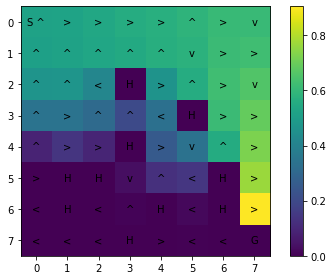

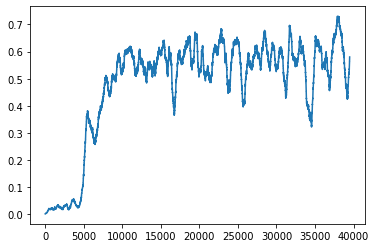

In [ ]:
plotQ(sarsa_q, 8)
plt.plot(runningAvg(rewards, 500))

0.852


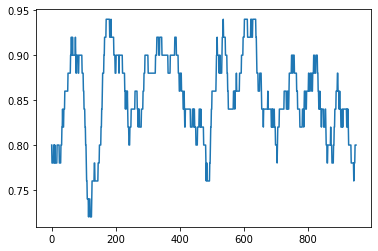

In [ ]:
#best 0,868
ite = 1000
reward = []
for i in range(ite):
    temp_reward=0
    env.reset()
    a = np.argmax(sarsa_q[0])
    done = False
    while not done:
        state, rew, done, info = env.step(a)
        temp_reward += rew
        a = np.argmax(sarsa_q[state])
    reward.append(temp_reward)
#print(reward)
print(np.mean(reward))
plt.plot(runningAvg(reward, 50))

## Q-learning
Implémentez l'algorithme Q-learning (en partant de SARSA, il ne devrait y avoir que quelques lignes de codes à modidier!)



In [ ]:
# à implémenter
def e_greedy(epsilon, q, s):
    """ Renvoie l'action choisie avec une politique e_greedy """
    p = np.random.uniform()
    if p > epsilon: # glouton
        list_q = np.argwhere(q[s] == np.amax(q[s])).flatten().tolist()
        action_picked = random.choice(list_q)
    else:  # exploration
        action_picked = random.choice([0, 1, 2, 3])
    return action_picked


def Q_learning(n_episodes, gamma, alpha, epsilon, numStates, numActions):
    # initialisation 
    q = np.zeros((numStates, numActions)) 
    rewards = []

    for episode in tqdm(range(n_episodes)):
        s = env.reset() # On initialise l'état frozen lake
        action_a = e_greedy(epsilon, q, s)
        done = False
        nbIt = 0
        while not done:
            observation, reward, done, info = env.step(action_a)
            if done:
                q[s][action_a] = q[s][action_a] + alpha * (reward - q[s][action_a])
                rewards.append(reward)
            else:
                #env.render()
                nbIt += 1
    
                # choisir a' pour s' à l'aide d'une politique dérivée
                action_a_prim = e_greedy(epsilon, q, observation)

                # Mise à jour
                best_action = random.choice(np.argwhere(q[observation] == np.amax(q[observation])).flatten().tolist())
                q[s][action_a] = q[s][action_a] + alpha * (reward + gamma*q[observation][best_action] - q[s][action_a])
                s = observation
                action_a = action_a_prim
        

    return q, rewards


In [ ]:
q_q, reward_q = Q_learning(n_episodes, gamma, alpha, epsilon, numStates, numActions)

100%|██████████| 40000/40000 [06:38<00:00, 100.29it/s]


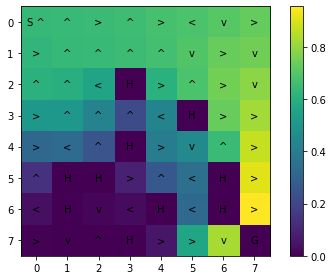

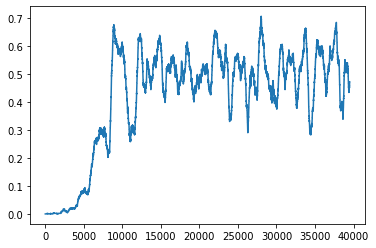

In [ ]:
plotQ(q_q, 8)
plt.plot(runningAvg(reward_q, 500))

0.793


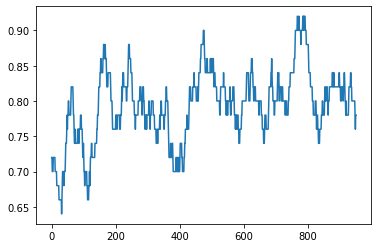

In [ ]:
# best = 0.846
ite = 1000
reward = []
for i in range(ite):
    temp_reward=0
    env.reset()
    a = np.argmax(q_q[0])
    done = False
    while not done:
        state, rew, done, info = env.step(a)
        temp_reward += rew
        a = np.argmax(q_q[state])
    reward.append(temp_reward)

print(np.mean(reward))
plt.plot(runningAvg(reward, 50))

## Comparaison

Comparer les politiques trouvées à l'aide de SARSA, Q-learning, et vous devriez aussi pouvoir utiliser le code de l'algorithme on policy Monte Carlo du TD précédent.

Avant convergence à l'optimal, on observe souvent que SARSA a choisi une politique moins risquée avant de tomber sur l'optimal pour le FrozenLake8x8.

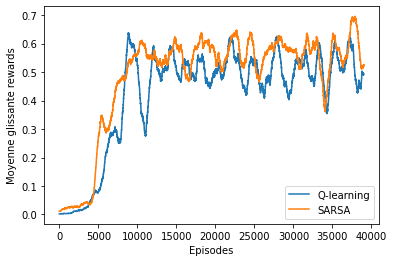

In [ ]:
plt.xlabel("Episodes")
plt.ylabel("Moyenne glissante rewards")
plt.plot(runningAvg(reward_q, windowSize=1000), label="Q-learning")
plt.plot(runningAvg(rewards, windowSize=1000), label="SARSA")
plt.legend()
plt.show()

## Cart-pole en tabulaire

On vous propose pour finir d'utiliser votre code et de tester l'apprentissage sur le problème du cart-pole. A priori, c'est un problème où les états sont des variables continues. On vous propose ici de discrétiser les variables et d'essayer d'utiliser une des méthodes pour voir vos résultats. 

La récompense que vous obtenez est le nombre de pas de temps où le baton est resté en équilibre. Si vous utilisez colab pour coder, vous ne pourrez malheureusement pas visualiser un épisode avec la méthode render :-(

Cet environnement Cart-Pole consiste à déplacer un chariot pour faire tenir en équilibre une poutre. Plus précisément:
* Il y a deux actions : gauche et droite (représentées par 0 et 1).
* L'observation reçue (c'est à dire l'état) est un tableau numpy comprenant 4 variables: la position du chariot, la vélocité, l'angle à la verticale et la position du haut de la poutre.
* L'épisode se termine lorsque l'angle de la poutre à la verticale dépasse 12 degrés.
* Les récompenses reçues sont égales à 1 sauf si l'angle dépasse 12 degrés.

On vous donne ci-dessous les fonctions pour réaliser la discrétisation et pour encoder l'état en un entier.


In [ ]:
env_CP = gym.make("CartPole-v0")
print("Environnement avec", env_CP.action_space.n, "actions")
print("L'espace des états est lui codé avec une class", env_CP.observation_space,
      " qui représente un espace continu")
print("Les bornes inférieures des intervalles sont:", env_CP.observation_space.low)
print("Les bornes supérieures des intervalles sont:", env_CP.observation_space.high)
env_CP.reset()
nbIt=0
done=False
while not done:
    observation, reward, done, info = env_CP.step(np.random.randint(2))
    nbIt+=1
print("Episode terminé après {} itérations".format(nbIt))
env_CP.close()

Environnement avec 2 actions
L'espace des états est lui codé avec une class Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)  qui représente un espace continu
Les bornes inférieures des intervalles sont: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Les bornes supérieures des intervalles sont: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Episode terminé après 26 itérations


In [ ]:
nval =5 # nombre de valeurs discrètes qu’une variable peut prendre
N= nval ** 4 # Puisqu’il y a 4 variables, la taille de l’espace est nval^4
print("Le nombre d'états sera ici de ", N)

Le nombre d'états sera ici de  625


In [ ]:
def discretise(x,mini,maxi): 
  # discretise x
  # renvoie un entier entre 0 et nval-1
  if x<mini: x=mini
  if x>maxi: x=maxi
  return int(np.floor((x-mini)*nval/(maxi-mini+0.0001)))

def encode(observation):
  pos = discretise(observation[0],mini=-1,maxi=1)
  vel = discretise(observation[1],mini=-1,maxi=1)
  angle = discretise(observation[2],mini=-1,maxi=1)
  pos2 = discretise(observation[3],mini=-1,maxi=1)
  return pos + vel*nval + angle*nval*nval + pos2*nval*nval*nval
  

Modifiez votre implémentation de Q-learning et/ou de SARSA pour tester si vous pouvez apprendre à maintenier le baton en équilibre. Une modification sera d'utilisé les fonctions ci-dessus pour encoder/decoder un état. Une autre sera surement d'ajouter le nombre d'états en paramètre car ce nombre est maintenant indépendant de l'environnement! 
Avec comme paramètre $\epsilon=0.1$, $\alpha=0.2$ et $\gamma=0.9$, j'arrive a atteindre un score autour de 90 pas de temps.

In [ ]:
# à implémenter et tester

# à implémenter
def e_greedy_CP(epsilon, q, s):
    """ Renvoie l'action choisie avec une politique e_greedy """
    p = np.random.uniform()
    if p > epsilon: # glouton
        list_q = np.argwhere(q[s] == np.amax(q[s])).flatten().tolist()
        action_picked = random.choice(list_q)
    else:  # exploration
        action_picked = random.choice([0, 1])
    return action_picked

def EpsGreedy(epsilon,q):
  p=np.random.rand()
  if p<epsilon:
    a=np.random.randint(2)
  else:
    a=np.argmax(q)
  return a

def SARSA_CP(env, n_episodes, numStates=N, gamma=0.8, alpha=0.2, epsilon=0.1, render=False, verbose=False):
    # initialisation 
    numActions = env.action_space.n
    q = np.zeros((numStates, numActions))
    rewards = []

    for episode in tqdm(range(n_episodes)):
        s = env.reset() # On initialise l'état frozen lake
        i_state = encode(s)
        #action_a = e_greedy_CP(epsilon, q, i_state)
        action_a=EpsGreedy(epsilon, q[i_state,:])
        done = False
        #nbIt = 0

        total_reward = 0

        while not done:
            observation, reward, done, info = env.step(action_a)
            i_state = encode(s)
            i_next_state = encode(observation)
            total_reward += reward
            if done:
                q[i_state][action_a] = q[i_state][action_a] + alpha * (reward - q[i_state][action_a])
                rewards.append(total_reward)
            else:
                # choisir a' pour s' à l'aide d'une politique dérivée
                #action_a_prim = e_greedy_CP(epsilon, q, i_next_state)
                action_a_prim = EpsGreedy(epsilon, q[i_next_state,:])

                # Mise à jour
                q[i_state][action_a] = q[i_state][action_a] + alpha * (reward + gamma*q[i_next_state][action_a_prim] - q[i_state][action_a])
                s = observation
                action_a = action_a_prim

        
    return q, rewards


In [ ]:
def exploitation_CP(env, q, num_episodes):
    
    # Initialization
    episodes_reward = []
    
    # For every episode...
    for i_episode in range(num_episodes):
        
        if i_episode % 1000 == 0:
            print(f'=====> Episode {i_episode}')
            
        total_reward = 0
        state = env.reset()
        action = np.argmax(q[encode(state)])
 
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_action = np.argmax(q[encode(state)])
            state = next_state
            action = next_action
            #print(f'  s = {state}, a = {action}, r = {reward}, s_next = {next_state}, a_next = {next_action}')
        
        episodes_reward.append(total_reward)
        
    return episodes_reward, np.mean(episodes_reward)

Dans la suite, nous essayons plusieurs paramètres différents.

Nous essaierons d'abord les paramètres suggérés dans l'énoncé.

In [ ]:
env_CP = gym.make("CartPole-v1")
num_episodes=40000
n_states=N
gamma=0.9
alpha=0.2
epsilon=0.1

q_CP_SARSA, episodes_reward_CP_SARSA = SARSA_CP(env_CP, num_episodes, n_states, gamma, alpha, epsilon)
plt.plot(runningAvg(episodes_reward_CP_SARSA, windowSize=100))

=====> Episode 0


119.042

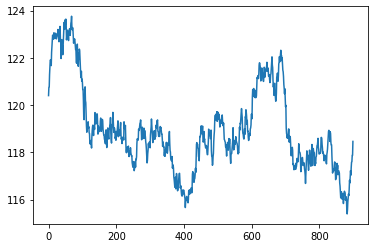

In [ ]:
episodes_reward_CP_SARSA_exploit, mean_CP_SARSA_exploit = exploitation_CP(env_CP, q_CP_SARSA, num_episodes=1000)
plt.plot(runningAvg(episodes_reward_CP_SARSA_exploit, windowSize=100))
mean_CP_SARSA_exploit

Avec ces paramètres, on observe un net plateau à partir d'environ 10000 épisodes autour d'environ 120 pas de temps. Cela est d'ailleurs confirmé lors de l'exploitation, puisqu'on obtient un score de 120 en moyenne.


Nous essayons maintenant en epsilon et un alpha différent. En effet, on souhaite observer un peu plus, au vu du nombre d'états différents assez grand. Egalement, on peut supposer qu'un alpha plus faible serait bénéfique pisqu'on oeut imaginer que le système du cartpole est très sensible et qu'il vaut mieux faire de tout petits pas.

In [ ]:
#alpha et epislon diff

100%|██████████| 40000/40000 [09:46<00:00, 68.20it/s]


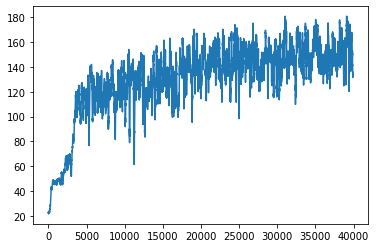

In [ ]:
env_CP = gym.make("CartPole-v1")
num_episodes=40000
n_states=N
gamma=0.9
alpha=0.05
epsilon=0.15

q_CP_SARSA, episodes_reward_CP_SARSA = SARSA_CP(env_CP, num_episodes, n_states, gamma, alpha, epsilon)
plt.plot(runningAvg(episodes_reward_CP_SARSA, windowSize=100))

=====> Episode 0


177.219

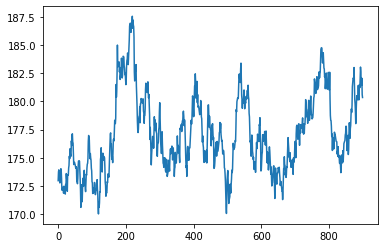

In [ ]:
episodes_reward_CP_SARSA_exploit, mean_CP_SARSA_exploit = exploitation_CP(env_CP, q_CP_SARSA, num_episodes=1000)
plt.plot(runningAvg(episodes_reward_CP_SARSA_exploit, windowSize=100))
mean_CP_SARSA_exploit

Les résultats sont nettement meilleurs avec ces nouveaux paramètres. Par ailleurs, même avec 40000 itérations il semblerait que la courbe ait toujours une tendance globalement croissante. On peut supposer qu'avec encore plus d'entrainements les resultats seraient meilleurs.

Nous essayons donc avec les meme alpha et epsilon mais avec un gamme plus faible, en supposant qu'il faut donner plus d'importance à la récompense à long terme.

100%|██████████| 40000/40000 [08:51<00:00, 75.29it/s] 


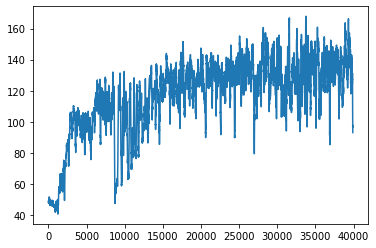

In [ ]:
env_CP = gym.make("CartPole-v1")
num_episodes=40000
n_states=N
gamma=0.7
alpha=0.05
epsilon=0.15

q_CP_SARSA, episodes_reward_CP_SARSA = SARSA_CP(env_CP, num_episodes, n_states, gamma, alpha, epsilon)
plt.plot(runningAvg(episodes_reward_CP_SARSA, windowSize=100))

=====> Episode 0


140.186

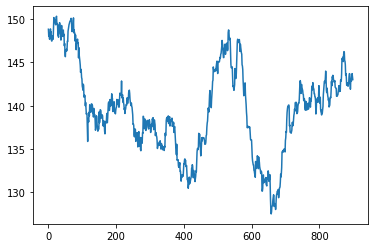

In [ ]:
episodes_reward_CP_SARSA_exploit, mean_CP_SARSA_exploit = exploitation_CP(env_CP, q_CP_SARSA, num_episodes=1000)
plt.plot(runningAvg(episodes_reward_CP_SARSA_exploit, windowSize=100))
mean_CP_SARSA_exploit